<a href="https://colab.research.google.com/github/shivckr/Data-Science-./blob/master/PCA_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download data from kaggle directly into colab

In [2]:
#Mount the drive to colab notebook
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [0]:
#To access a list of Kaggle datasets.
#!kaggle datasets list

In [0]:
# if you are looking for specific dataset 
#!kaggle datasets list -s MNIST

In [0]:
# copy API and download dataset into your drive
#!kaggle competitions download -c digit-recognizer

In [0]:
# check the file in your directory
#!ls


In [8]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [0]:
#Read data
import pandas as pd
df = pd.read_csv('MNIST_train.csv')

df.head()
labels = df.label

# Applying PCA on MNIST data

In [0]:
#credit:
# https://colah.github.io/posts/2014-10-Visualizing-MNIST/
# https://medium.com/analytics-vidhya/principal-component-analysis-pca-with-code-on-mnist-dataset-da7de0d07c22

In [0]:
import numpy as np
from  sklearn import  decomposition
pca = decomposition.PCA()
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [0]:
# data preprocessing 
#It is mandatory before applying PCA to convert mean=0 and standard deviation =1 for each variable. StandardScaler do mean normalizarion
standardized_data = StandardScaler().fit_transform(df)
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T, sample_data) 

In [0]:
# the parameter ‘eigvals’ is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))
# print(“Shape of eigen vectors = “,vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
#print(“Updated shape of eigen vectors = “,vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

In [0]:
#Projecting the original data sample on the plane formed by two principal eigenvectors by vector-vector multiplication.
new_coordinates = np.matmul(vectors, sample_data.T)

In [42]:
#Appending label to the 2d projected data(vertical stack) and creating a new data frame for plotting the labeled points.
new_coordinates = np.vstack((new_coordinates, labels)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=('1st_principal', '2nd_principal', 'labels'))
print(dataframe.head())

   1st_principal  2nd_principal  labels
0      -3.834079       5.498016     1.0
1      -1.533175      -6.018994     0.0
2      -2.425707       1.959875     1.0
3      -2.284497      -5.716447     4.0
4      -1.153826      -6.049490     0.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


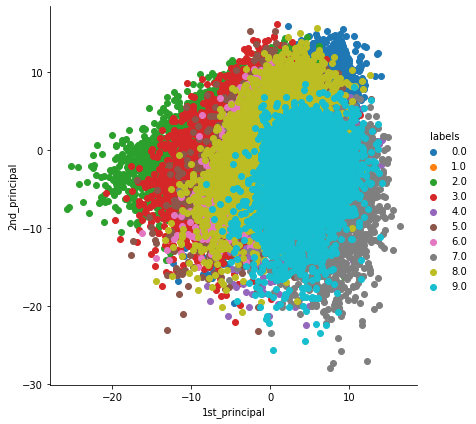

In [47]:
# plotting the 2d data points with seaborn
import seaborn as sns
sns.FacetGrid(dataframe, hue='labels', size=6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()
plt.show()